In [2]:
import pandas as pd

df = pd.read_csv('TASK-ML-INTERN.csv')


In [3]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [4]:
print(f'Total mising values are :{df.isnull().sum().sum()}')

Total mising values are :0


In [5]:
df['vomitoxin_ppb'].describe()

count       500.000000
mean       3410.006000
std       13095.803483
min           0.000000
25%         137.500000
50%         500.000000
75%        1700.000000
max      131000.000000
Name: vomitoxin_ppb, dtype: float64

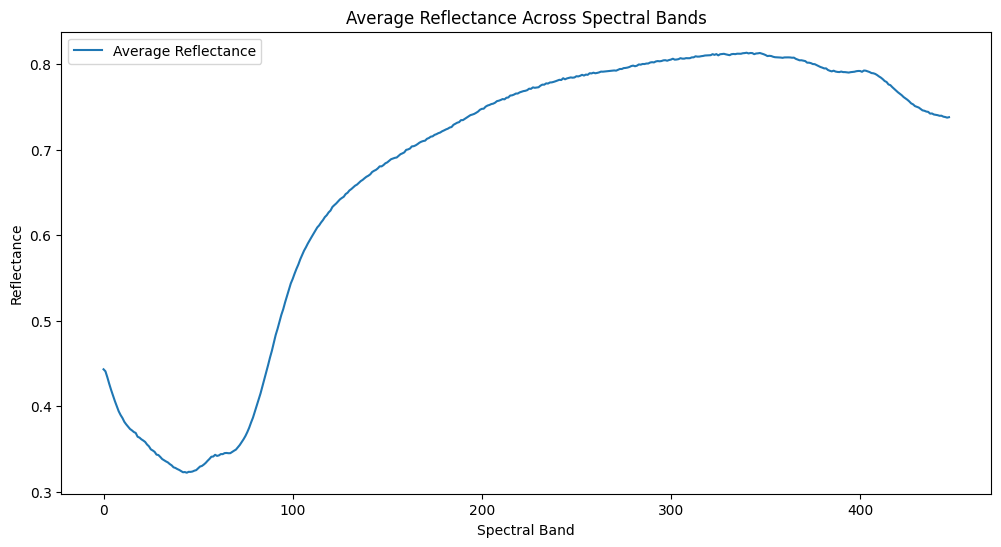

In [6]:
import matplotlib.pyplot as plt

# Calculate the average reflectance for each spectral band
average_reflectance = df.iloc[:, 1:-1].mean()

# Plot the average reflectance
plt.figure(figsize=(12, 6))
plt.plot(average_reflectance.index.astype(int), average_reflectance.values, label='Average Reflectance')
plt.xlabel('Spectral Band')
plt.ylabel('Reflectance')
plt.title('Average Reflectance Across Spectral Bands')
plt.legend()
plt.show()

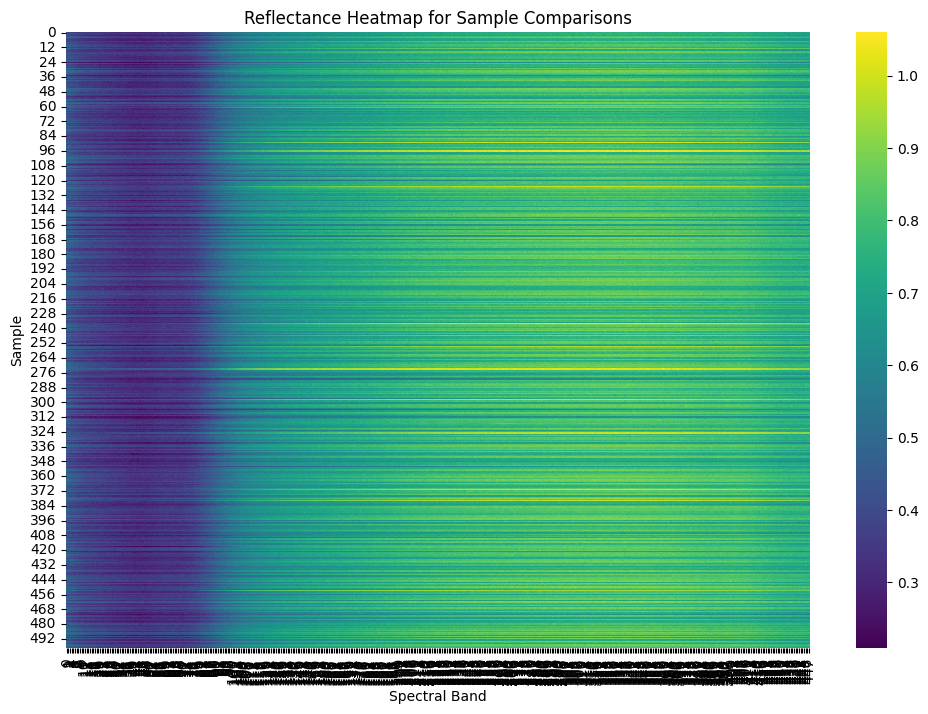

In [7]:
import seaborn as sns

# Select a subset of samples for visualization to avoid overcrowding
sample_subset = df.iloc[:, 1:-1]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sample_subset, cmap='viridis', xticklabels=sample_subset.columns.astype(int))
plt.xlabel('Spectral Band')
plt.ylabel('Sample')
plt.title('Reflectance Heatmap for Sample Comparisons')
plt.show()

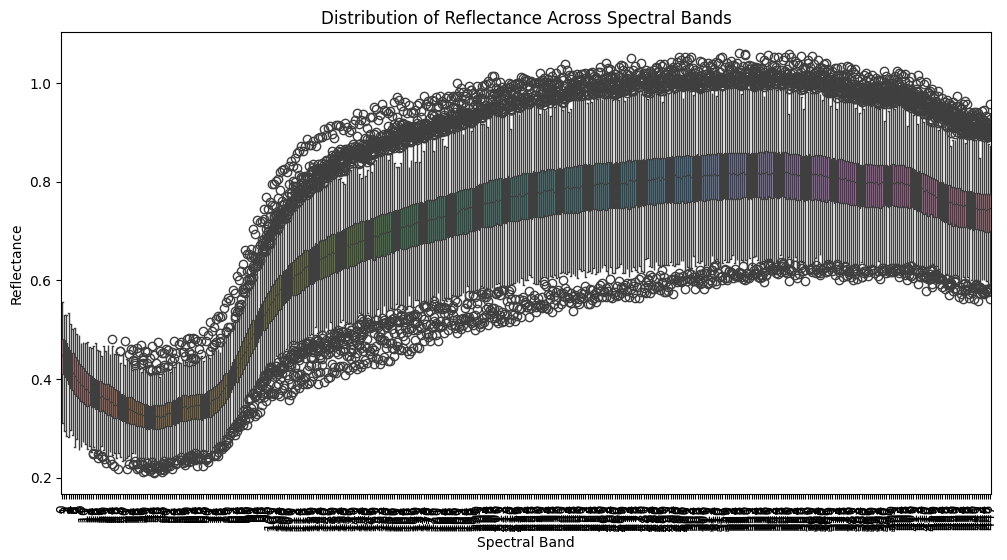

In [8]:
# Boxplot for reflectance distribution across spectral bands
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:-1])
plt.xlabel('Spectral Band')
plt.ylabel('Reflectance')
plt.title('Distribution of Reflectance Across Spectral Bands')
plt.xticks(rotation=90)
plt.show()

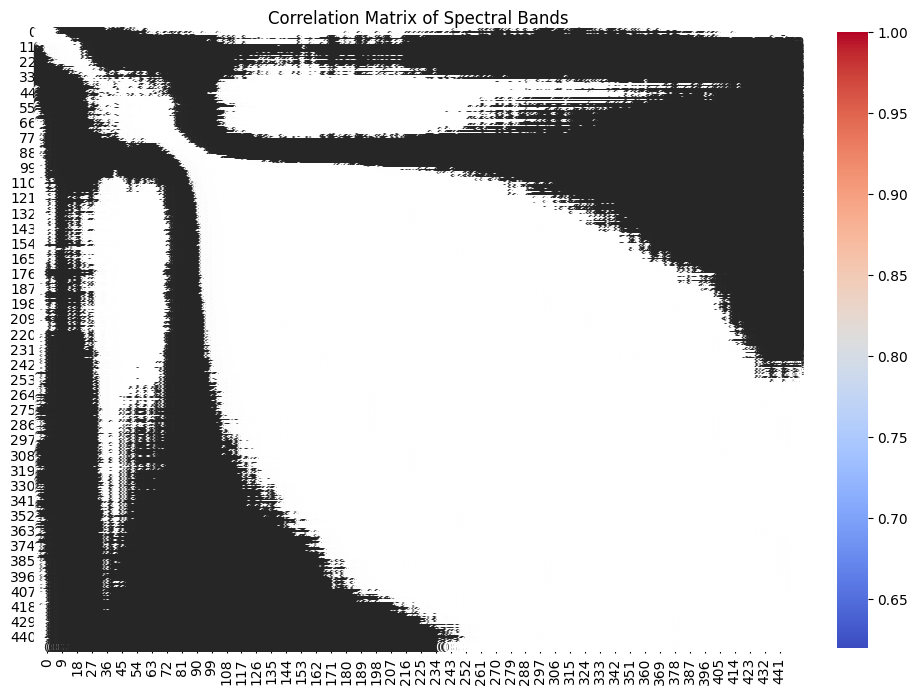

In [9]:
# Calculate the correlation matrix
corr_matrix = df.iloc[:, 1:-1].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Spectral Bands')
plt.show()

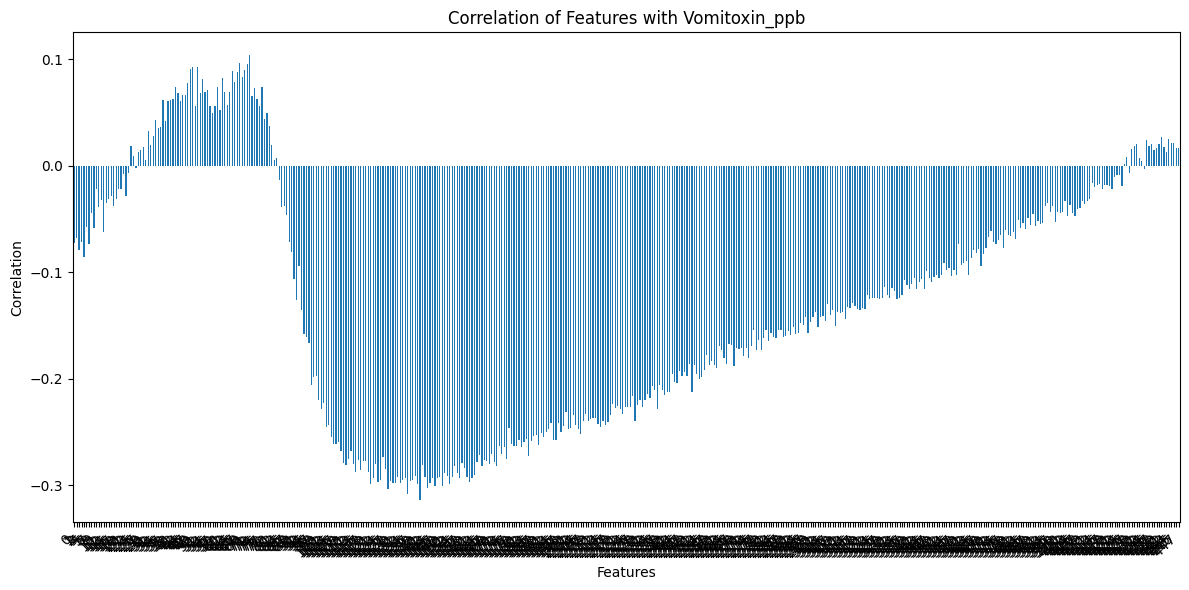

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate correlations, excluding the first column (hsi_id) which contains strings
correlations = df.iloc[:, 1:].corr()['vomitoxin_ppb']

# Drop the correlation of 'vomitoxin_ppb' with itself (which is always 1)
correlations = correlations.drop('vomitoxin_ppb')

# Plot correlations
plt.figure(figsize=(12, 6))
correlations.plot.bar()
plt.title('Correlation of Features with Vomitoxin_ppb')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()